In [3]:
import re
import math

bfs_file = "/Users/sakshmenon/Desktop/PLM/Workflow Gen/Similarity Search/s_cerevisiae2s_pombe.bfs.k30.txt"

def extract_query_and_matches(text):
    text = text.split('\n')[:-1]
    query = text[0].split('\t')[1:]
    top_matches = text[1:]

    return {
        "Query": query,
        "Matches": [{"Score": match.split('\t')[1], "Protein ID": match.split('\t')[2][1:]} for match in top_matches]
    }

match_list = []
with open(bfs_file) as file_obj:
    content = file_obj.read()
    queries = content.split('\n\n')
    for query in queries[1:-1]:
        result = extract_query_and_matches(query)
        match_list.append(result)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate some sample continuous data
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=500)  # Normally distributed data

def plot_distribution(data):
    # Set the style for better aesthetics
    sns.set(style="whitegrid")

    # Create a figure and axes for the subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # KDE Plot
    sns.kdeplot(data, shade=True, color='purple', ax=axes[0])
    axes[0].set_title('Kernel Density Estimation (KDE)')
    axes[0].set_xlabel('Data Values')
    axes[0].set_ylabel('Density')

    # Histogram with KDE overlay
    sns.histplot(data, bins=30, kde=True, color='green', ax=axes[1])
    axes[1].set_title('Histogram with KDE')
    axes[1].set_xlabel('Data Values')
    axes[1].set_ylabel('Density')

    # Display the plots
    plt.suptitle('Distribution Plots of Continuous Data', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()


In [37]:
w_sum = []
d_ratio = []
d_w_conf = []
n_g_score = []
harm_mean = []
lam = 1.25
for query in match_list:
    matches = query['Matches']
    scores = [float(set['Score']) for set in matches][:10]

    w_sum.append(sum([i[1]/(i[0]+1) for i in enumerate(scores)]))
    d_ratio.append(scores[0]/(sum([i for i in scores[1:]])/9))
    d_w_conf.append(sum([i[1]*math.e**(-lam*(i[0])) for i in enumerate(scores)]))
    n_g_score.append(scores[1]-scores[0]/np.var(scores))
    harm_mean.append(len(scores)/sum([1/i for i in scores]))

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_90264/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


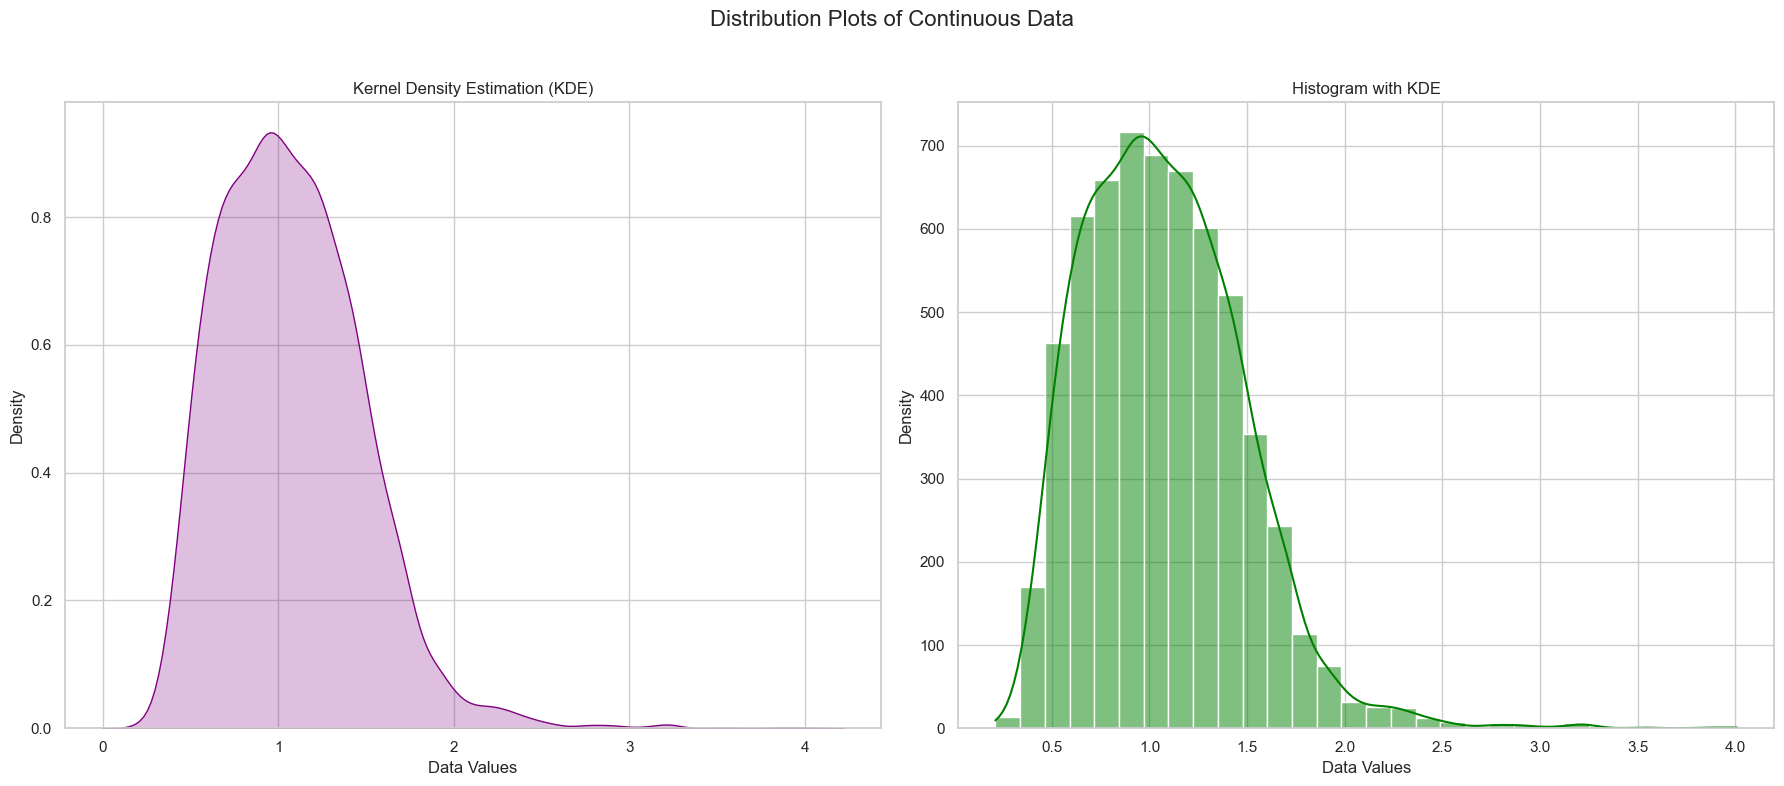

In [58]:
plot_distribution(d_w_conf)

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_90264/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


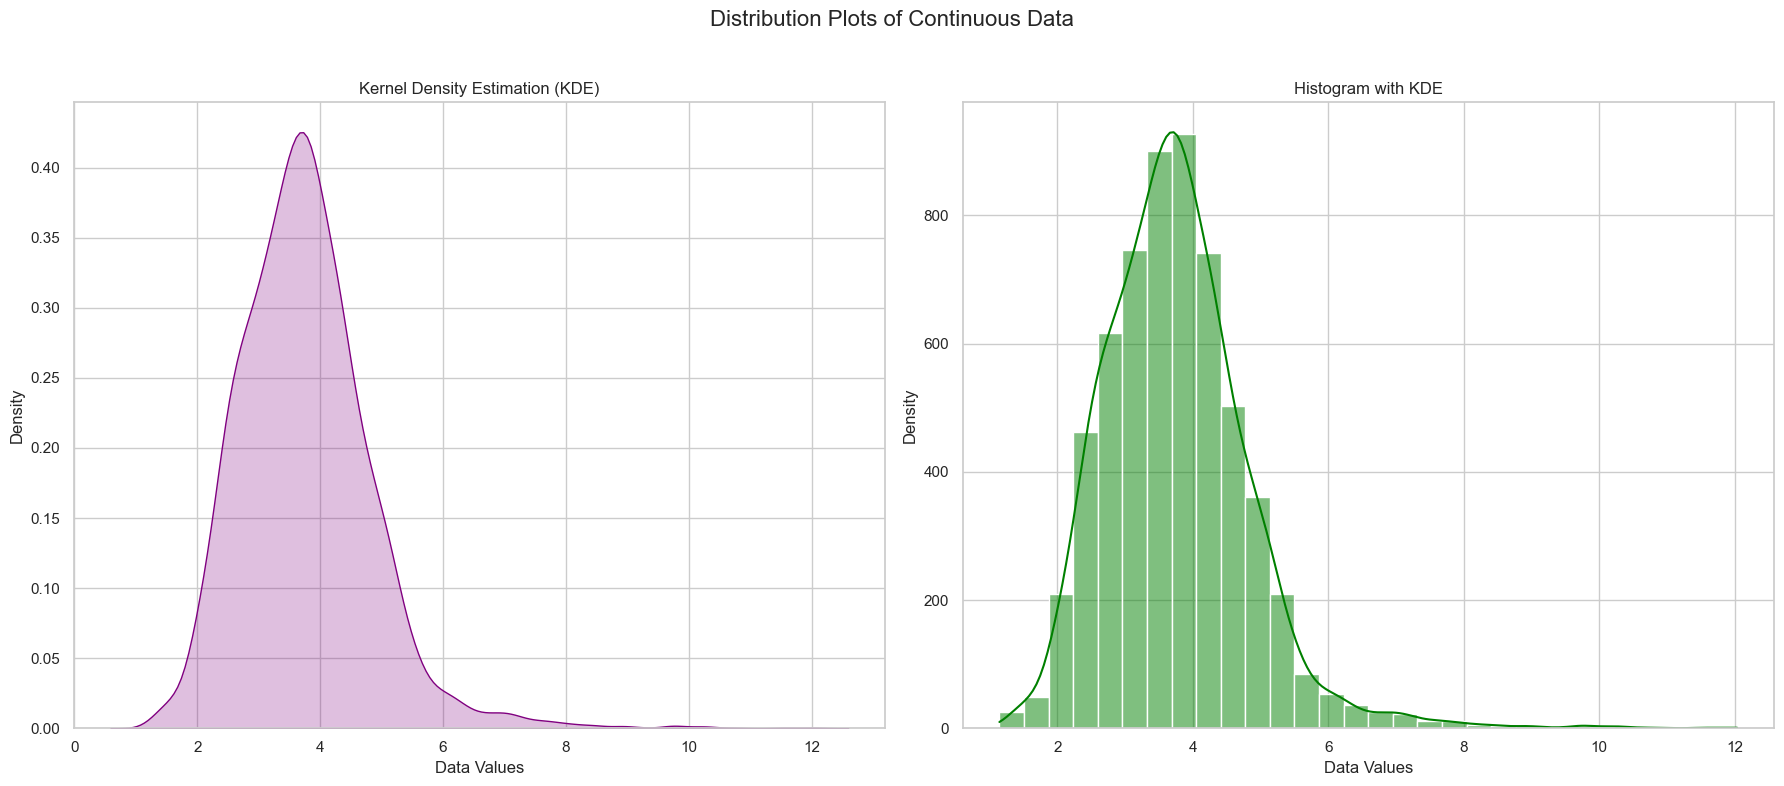

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_90264/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


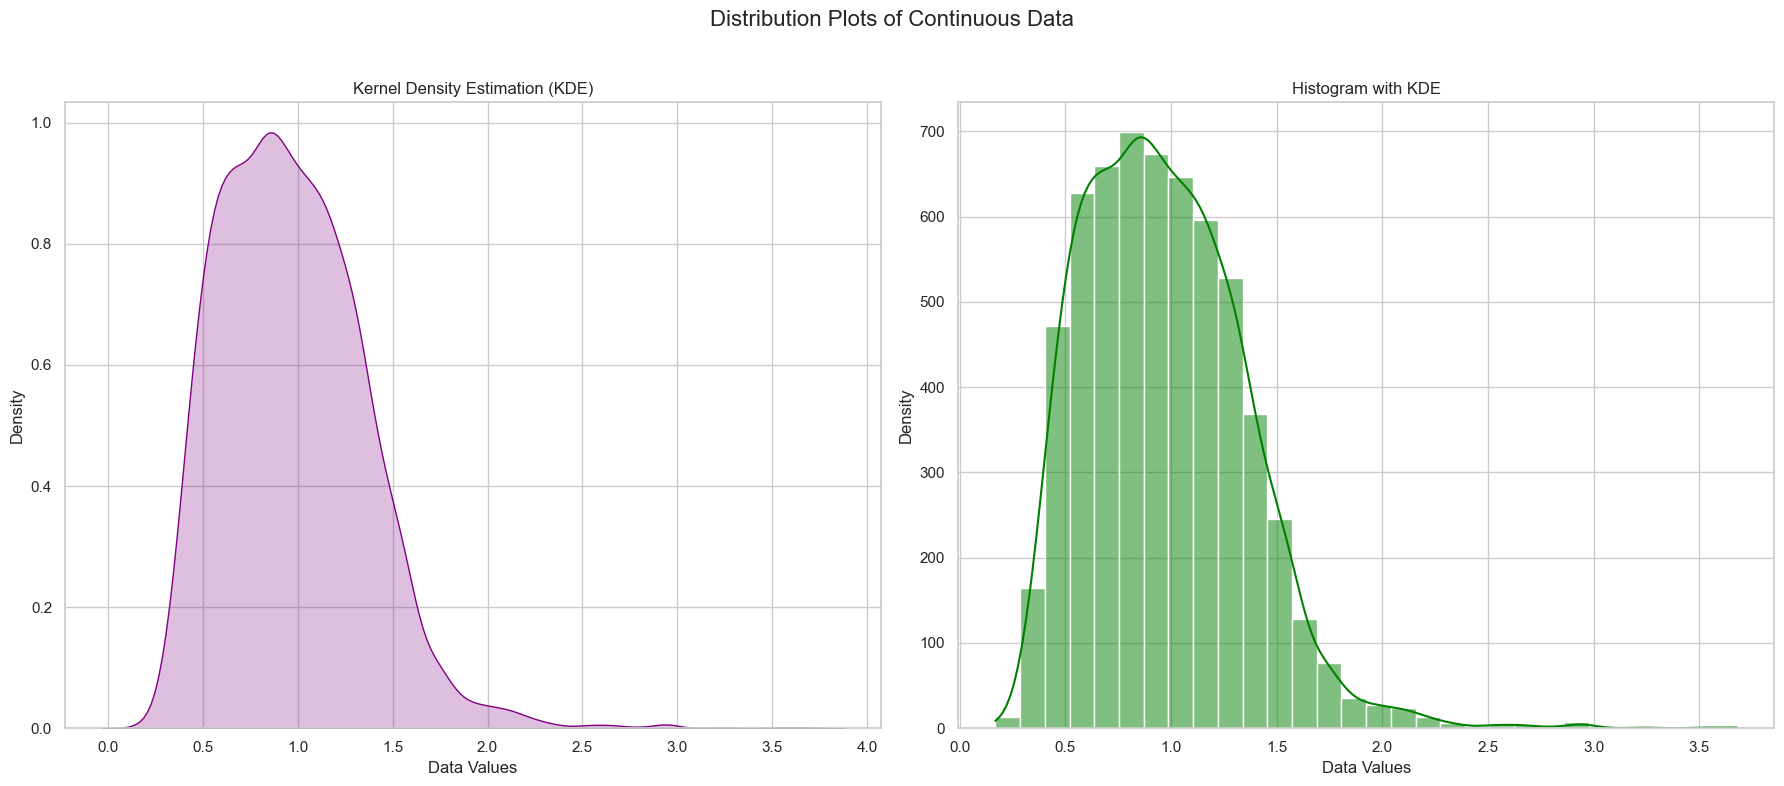

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_90264/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


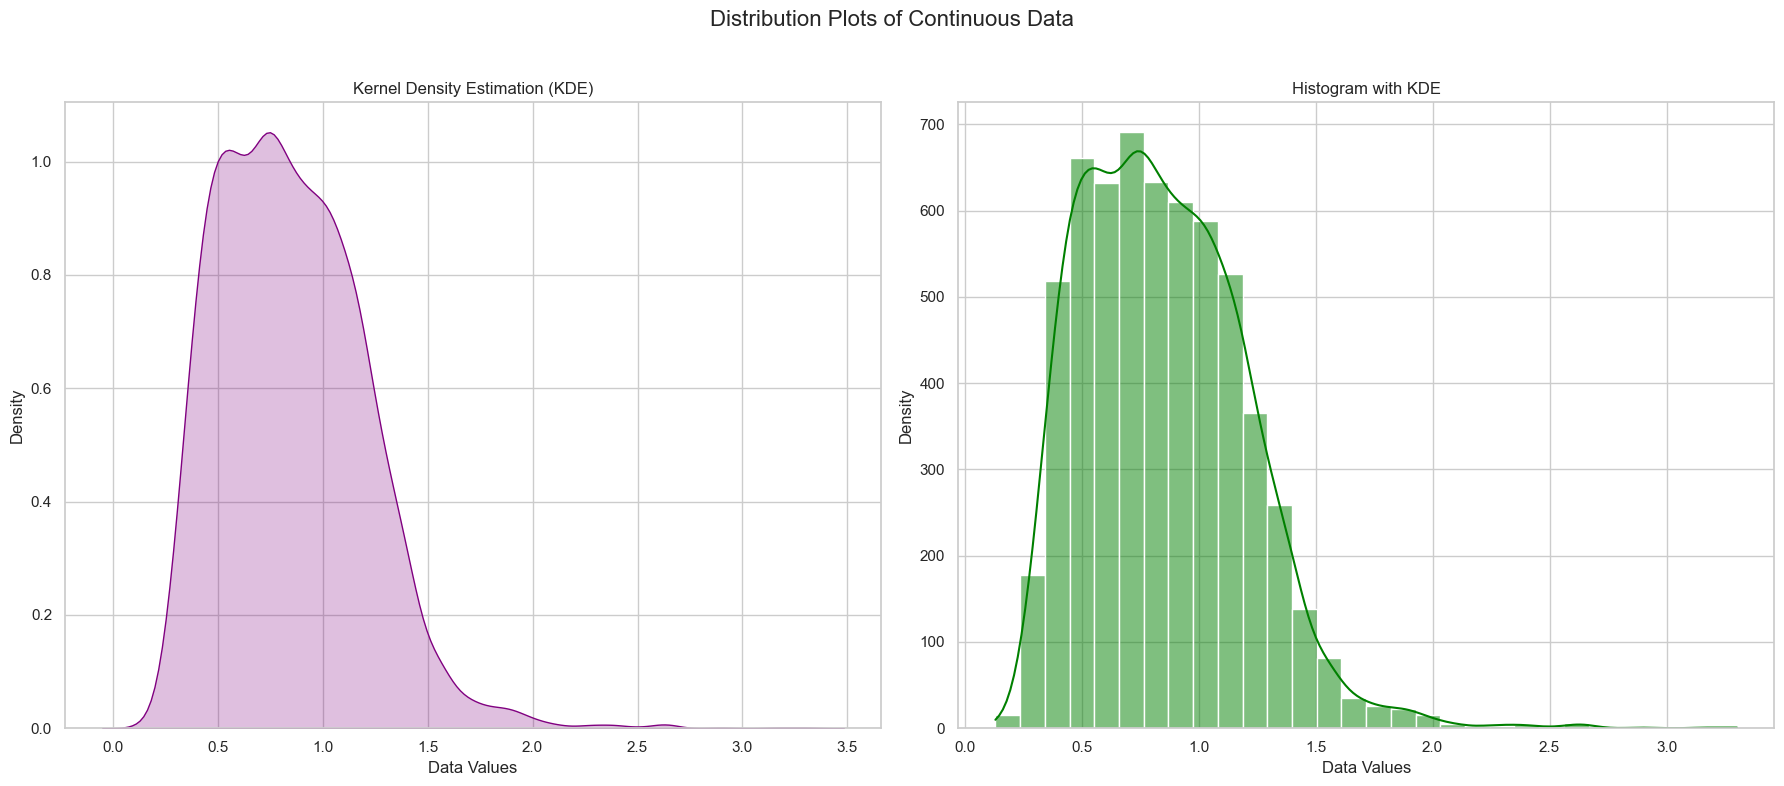

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_90264/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


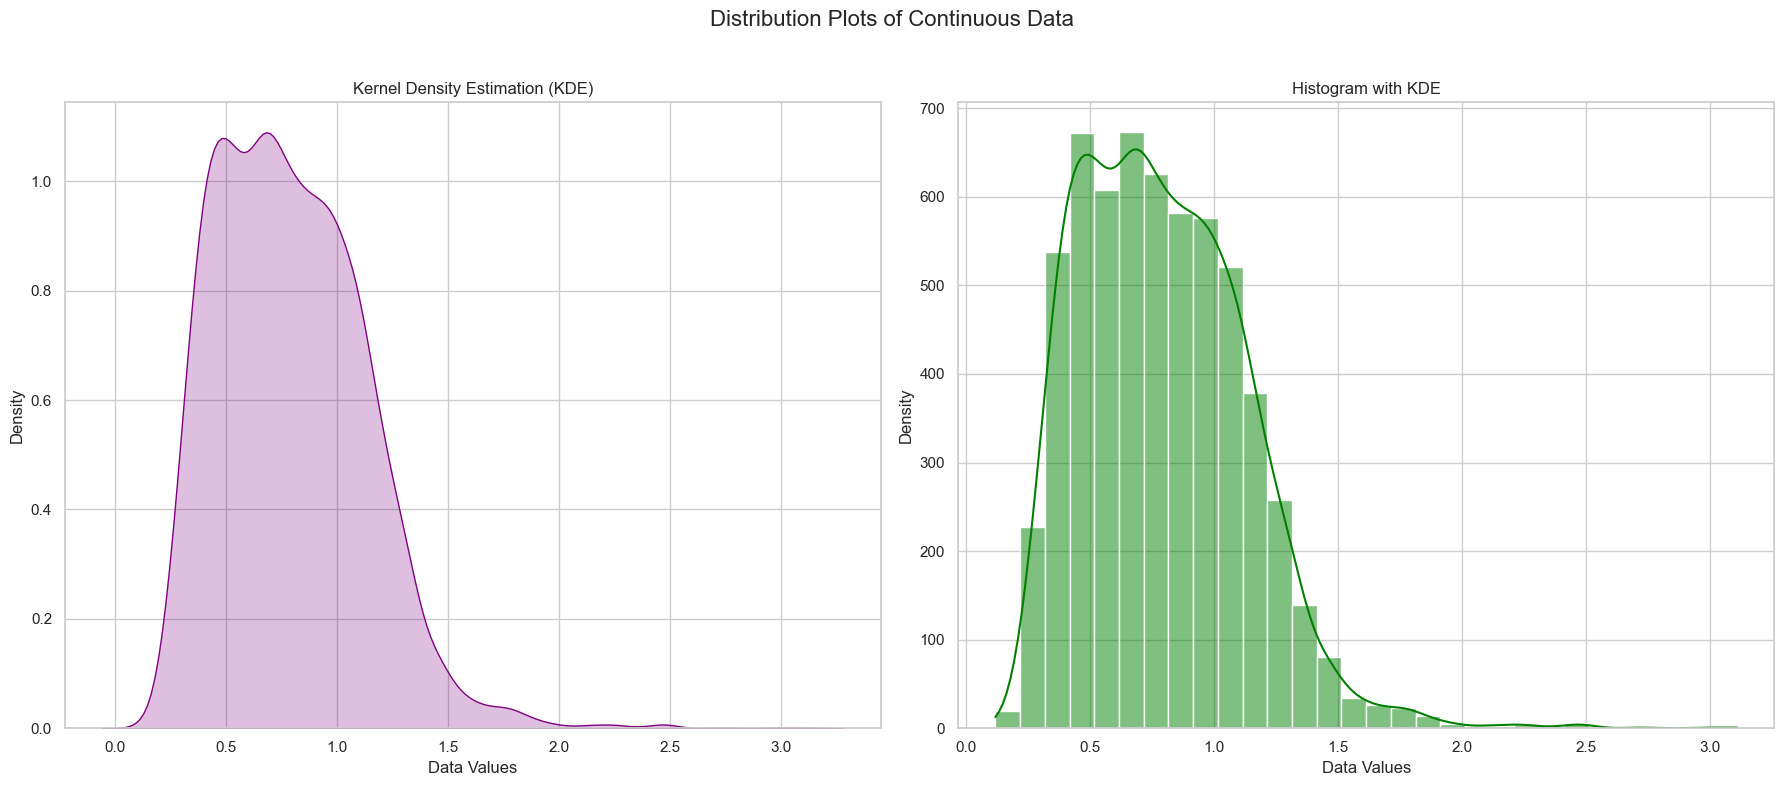

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_90264/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


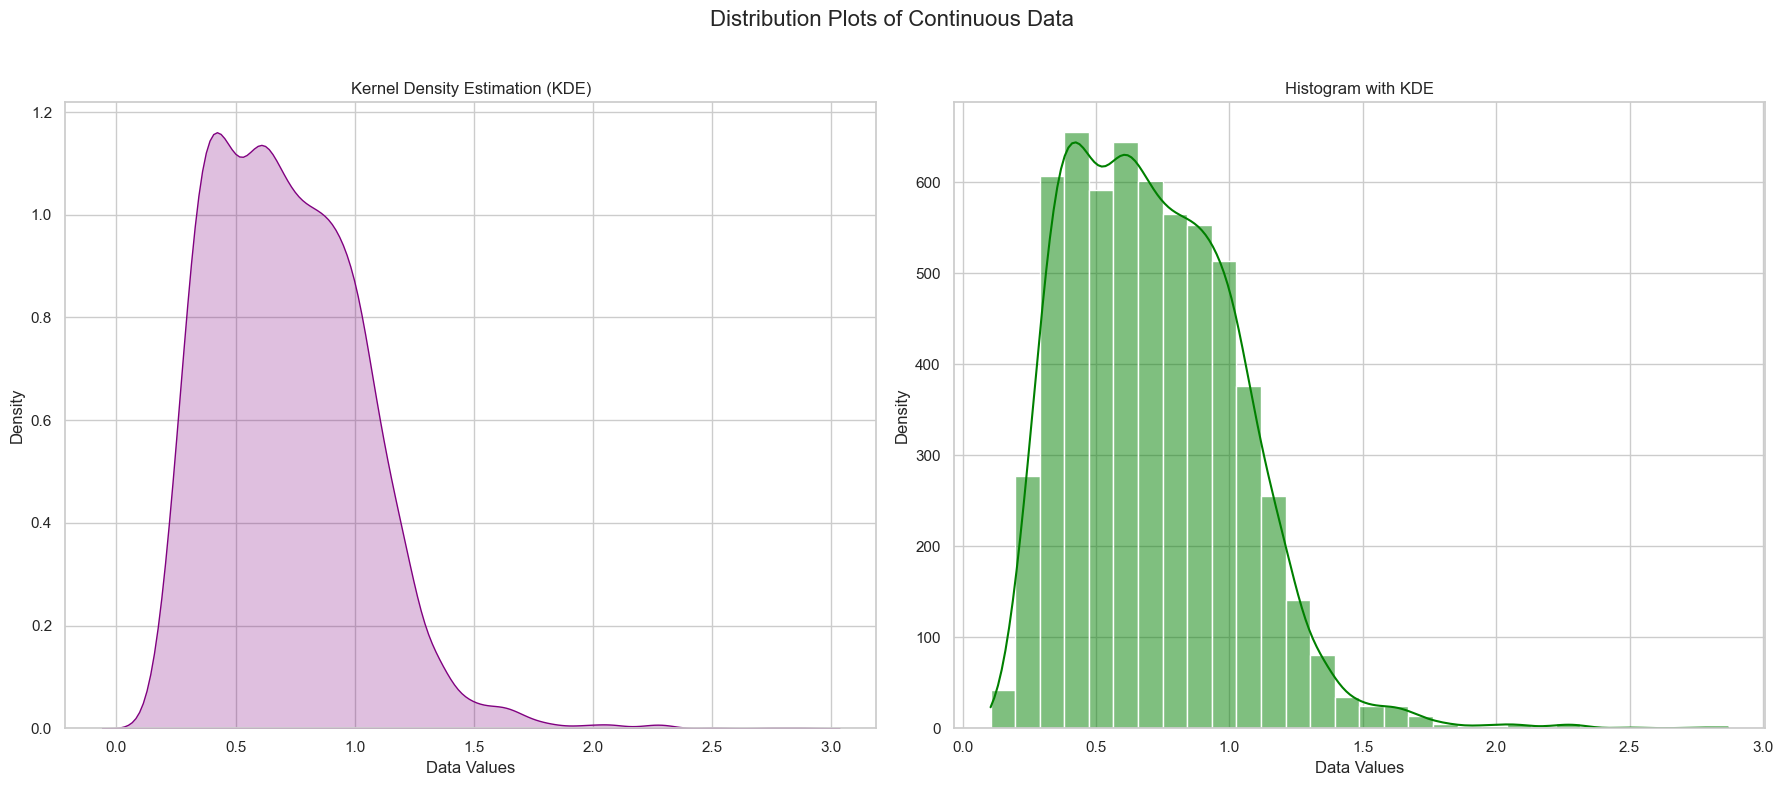

In [56]:

d_w_conf = []
lamb = [0.25,1.5,2,2.5,5]
for lam in lamb:
    d_w_conf = []
    for query in match_list:
        matches = query['Matches']
        scores = [float(set['Score']) for set in matches][:10]

        d_w_conf.append(sum([i[1]*math.e**(-lam*(i[0])) for i in enumerate(scores)]))
    plot_distribution(d_w_conf)

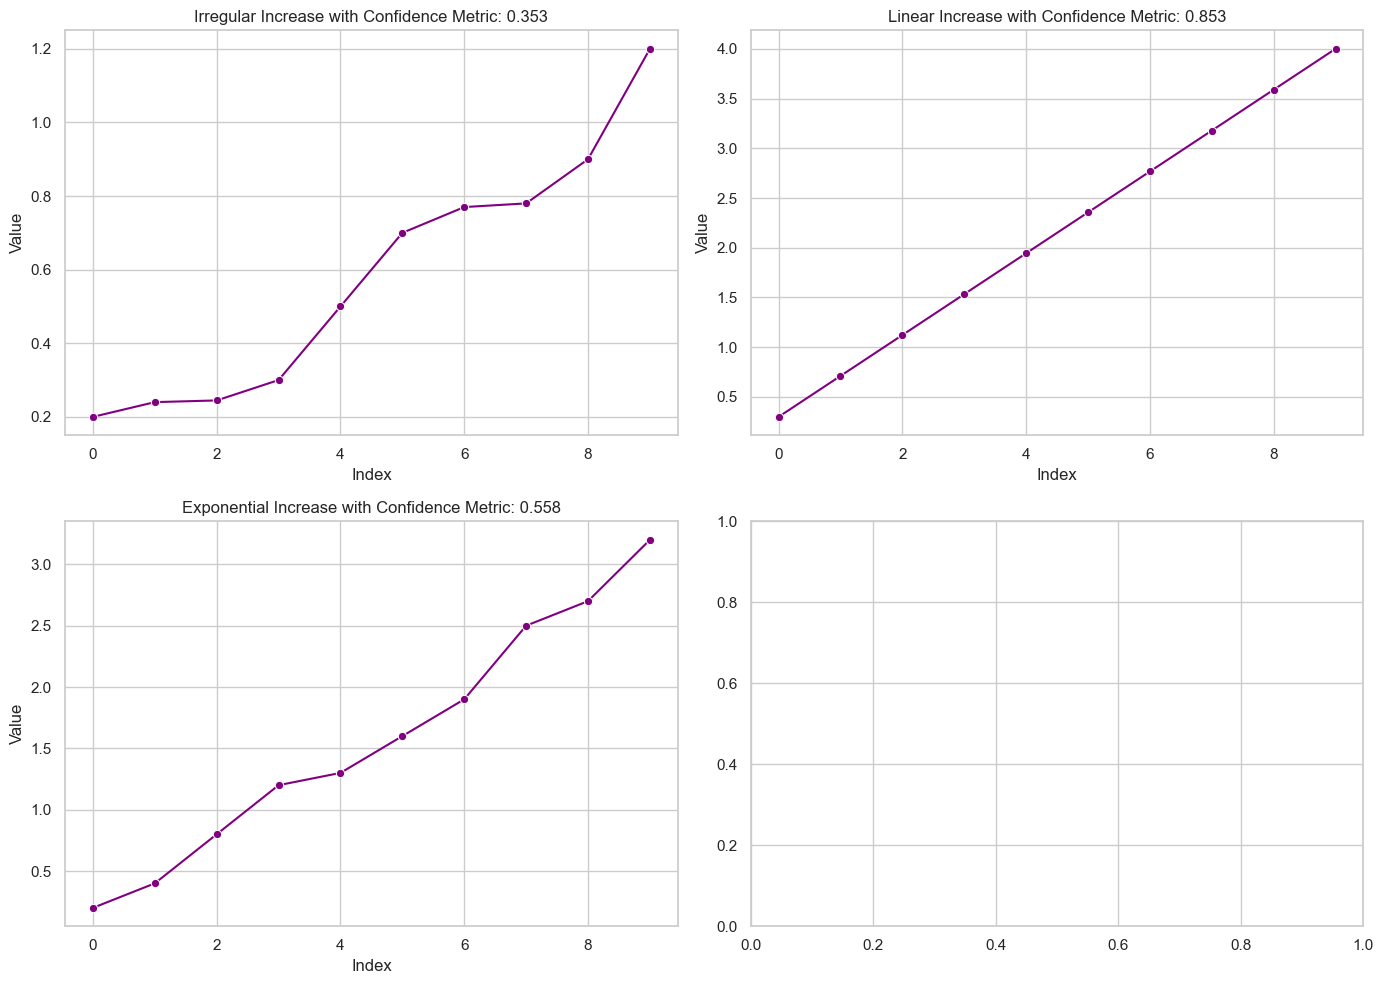

Confidence Metric for Irregular Dataset: 0.353
Confidence Metric for Linear Dataset: 0.853
Confidence Metric for Exponential Dataset: 0.558


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate the four datasets with different patterns
data_irregular = np.sort(np.random.uniform(0.3, 4, 10))  # Irregular increase
data_linear = np.linspace(0.3, 4, 10)                     # Linear increase
data_exponential = np.exp(np.linspace(0.3, np.log(4), 10))  # Exponential increase

data_irregular = [0.2,0.24,0.2446,0.3,0.5,0.7,0.77,0.78,0.9,1.2]
data_exponential = [0.2, 0.4, 0.8, 1.2, 1.3, 1.6, 1.9, 2.5, 2.7, 3.2]



data_sets = [data_irregular, data_linear, data_exponential]
decay_constant = 1

# Function to calculate the confidence metric
def calculate_confidence(data, decay_constant=1):
    return sum(value / np.exp(index * decay_constant) for index, value in enumerate(data))

# Plotting and computing confidence
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()  # Flatten axes array for easy indexing
confidence_metrics = []

for i, data in enumerate(data_sets):
    # Calculate confidence metric for each dataset
    confidence = calculate_confidence(data, decay_constant)
    confidence_metrics.append(confidence)
    
    # Plot the distribution as a line plot for each dataset
    sns.lineplot(x=range(len(data)), y=data, marker="o", ax=axes[i], color="purple")
    pattern_name = ["Irregular", "Linear", "Exponential", "Logarithmic"][i]
    axes[i].set_title(f'{pattern_name} Increase with Confidence Metric: {confidence:.3f}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Display the confidence metrics
for i, confidence in enumerate(confidence_metrics):
    pattern_name = ["Irregular", "Linear", "Exponential", "Logarithmic"][i]
    print(f"Confidence Metric for {pattern_name} Dataset: {confidence:.3f}")


/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_96011/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


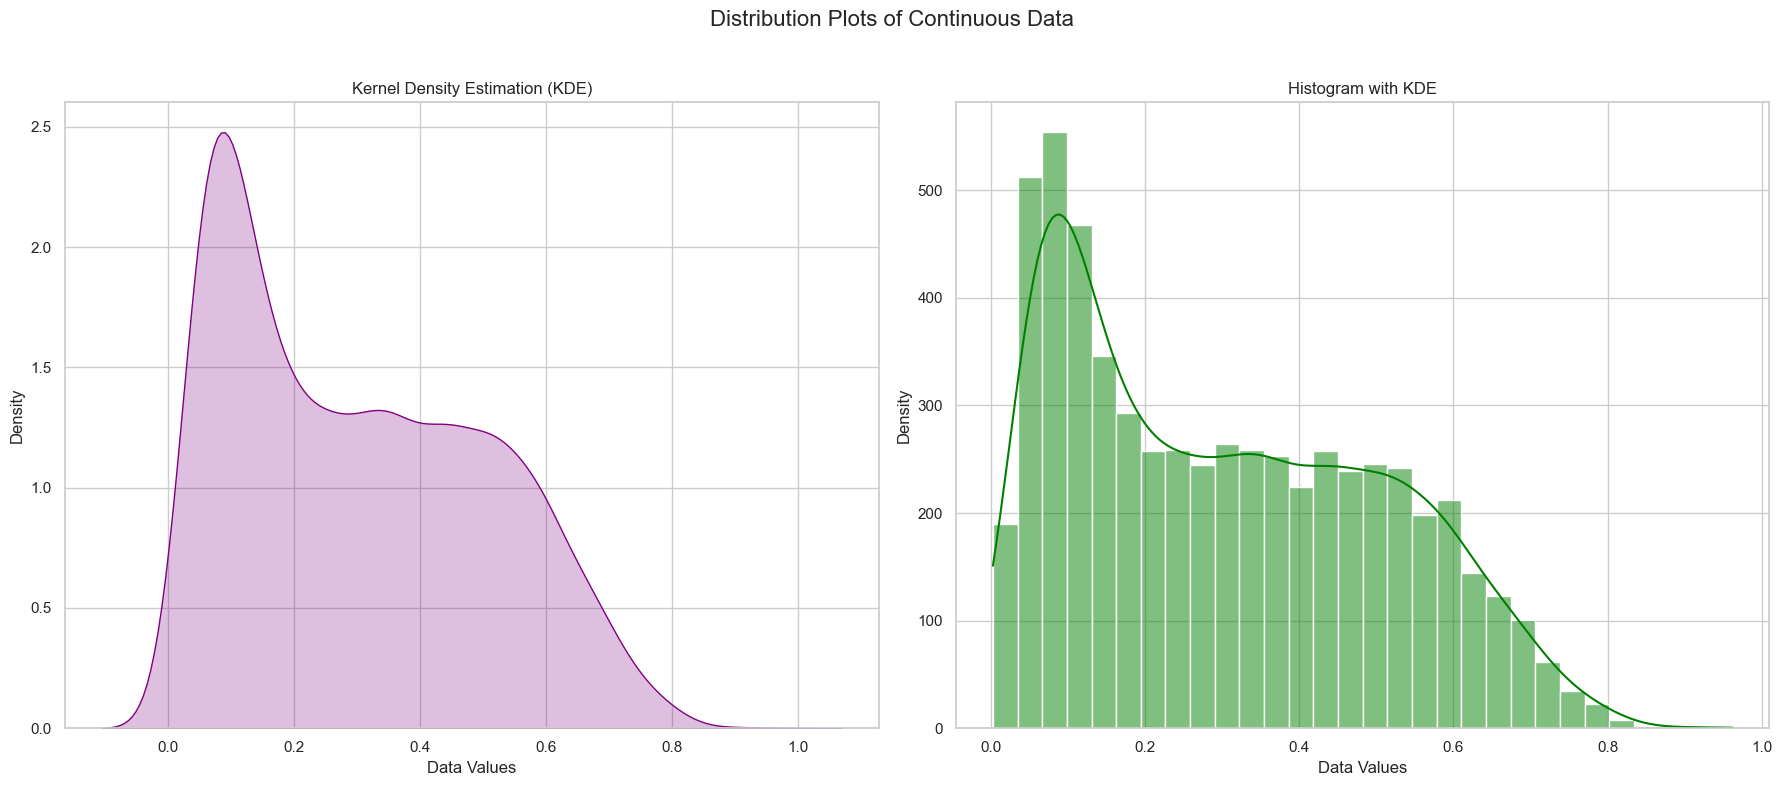

In [40]:
plot_distribution([1-i for i in d_ratio])

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_89389/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


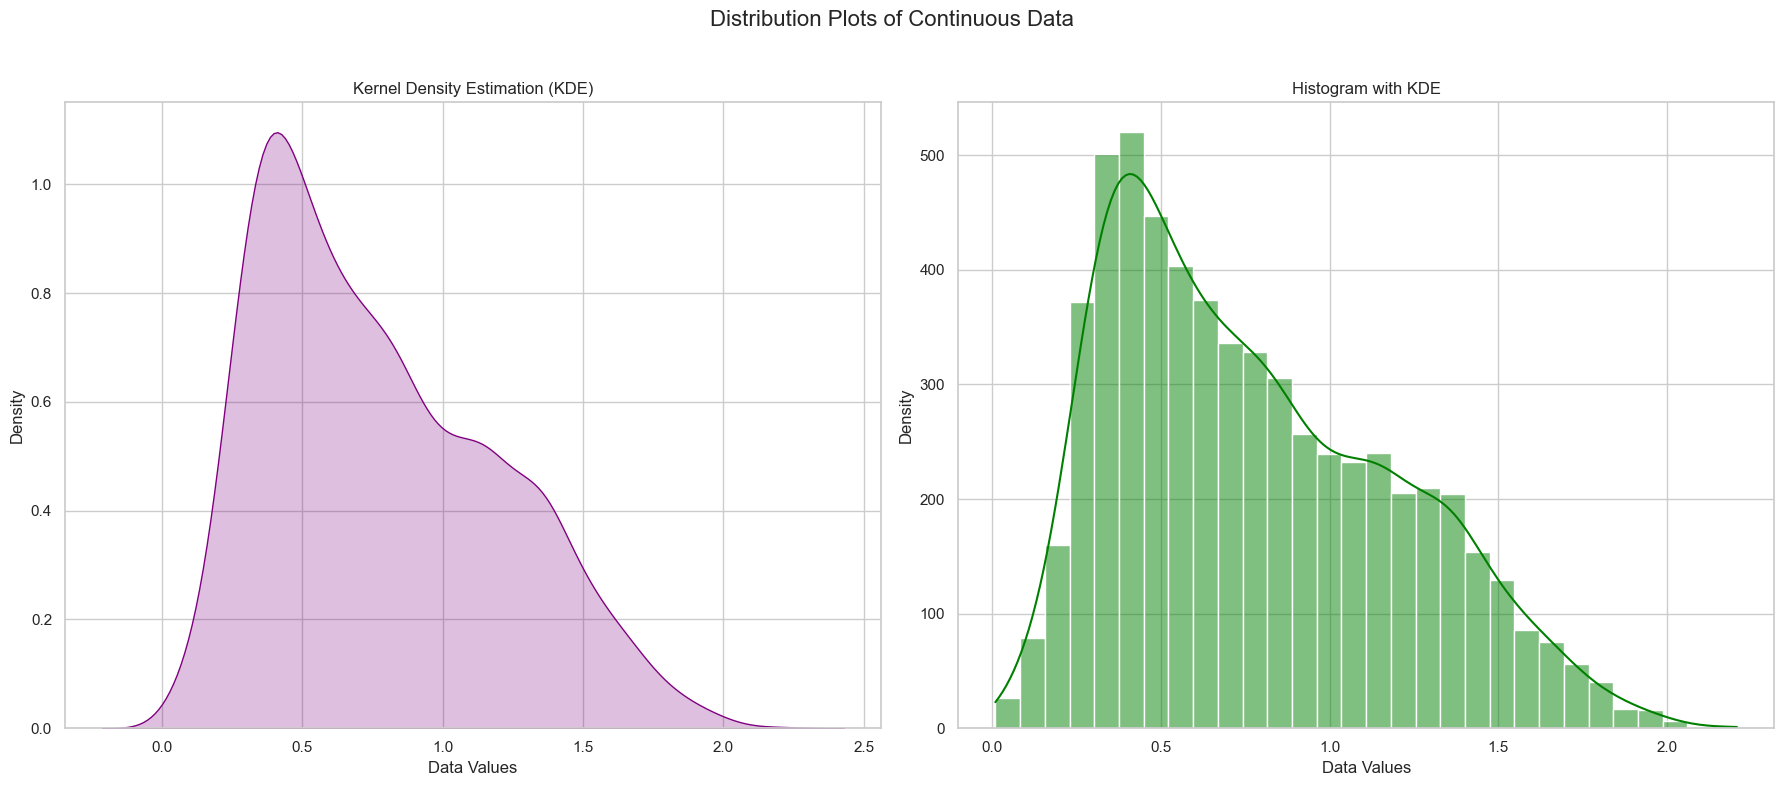

In [ ]:
normaalized_top_scores = []
for query in match_list:
    matches = query['Matches']
    scores = [float(set['Score']) for set in matches]
    normaalized_top_scores.append(math.e**(-2*(scores[0]-0.5)))

plot_distribution(normaalized_top_scores)

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_90264/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


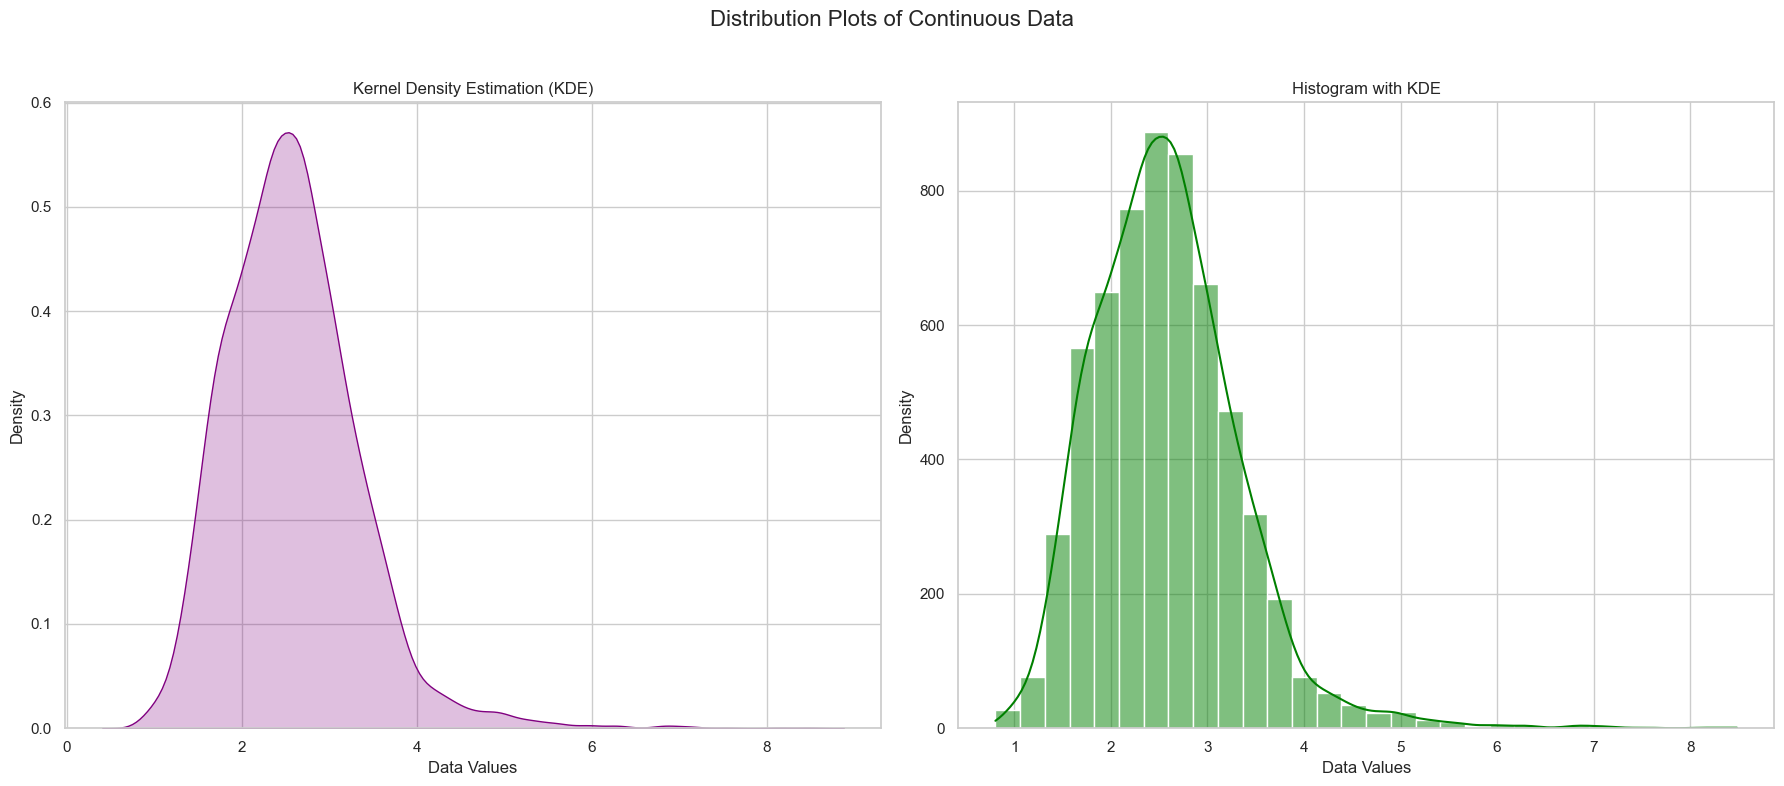

In [15]:
plot_distribution(w_sum)

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_96011/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


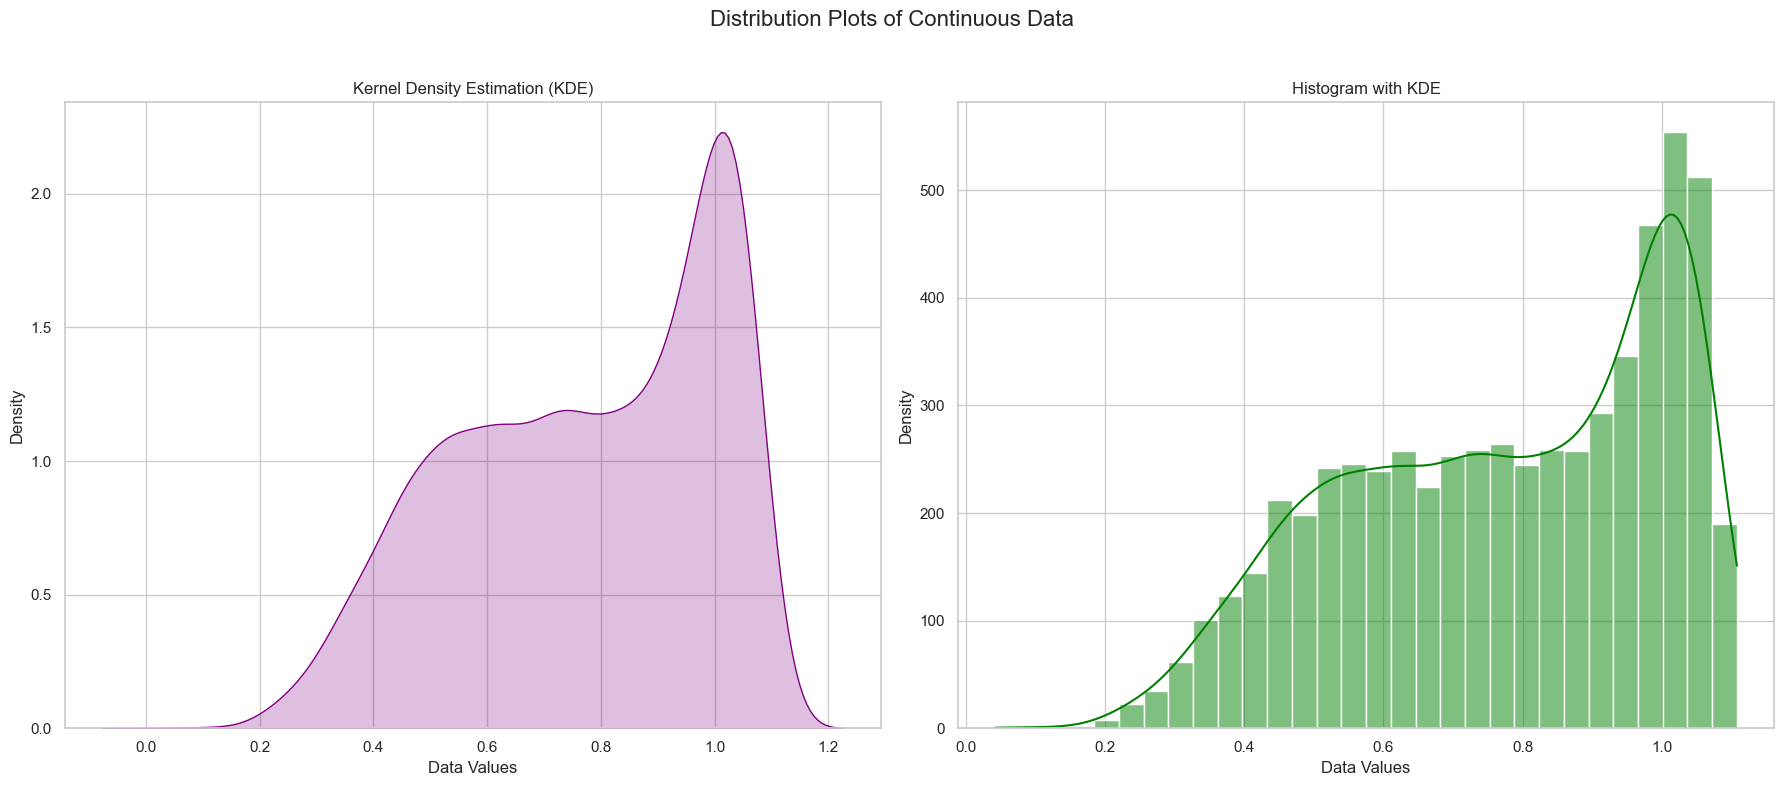

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_96011/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


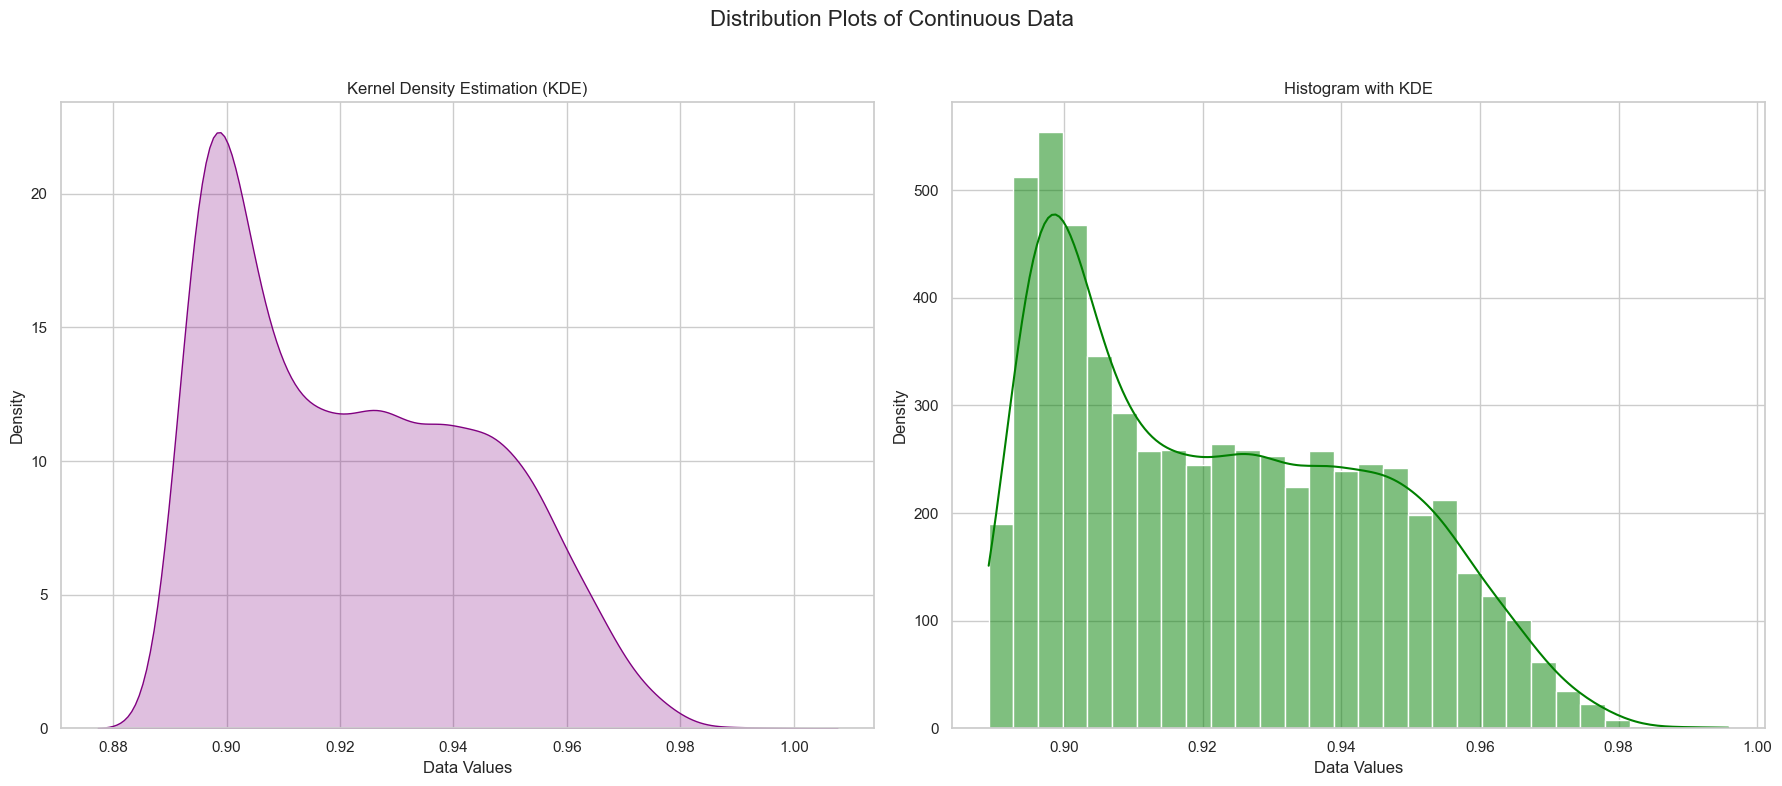

In [10]:
plot_distribution(d_ratio)
plot_distribution([(1 - (i/10)) for i in d_ratio])

In [36]:
for match in match_list:
    if match['Query'][0] == ">NP_015304.1 Ecm23p [Saccharomyces cerevisiae S288C]":
        q = match
        scores = [float(i['Score']) for i in match['Matches']]

s = np.array(scores)
print(s)
print(s[1:].mean())
print(s[0]/s[1:].mean())

[1.085 1.116 1.124 1.124 1.163 1.169 1.184 1.193 1.196 1.202 1.21  1.214
 1.219 1.22  1.225 1.226 1.23  1.242 1.242 1.249 1.251 1.251 1.252 1.254
 1.254 1.255 1.255 1.256 1.258 1.259]
1.217
0.8915365653245685


In [28]:
match['Query'][0] == '>NP_878108.1 uncharacterized protein YJR151W-A [Saccharomyces cerevisiae S288C]'

True

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_90264/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


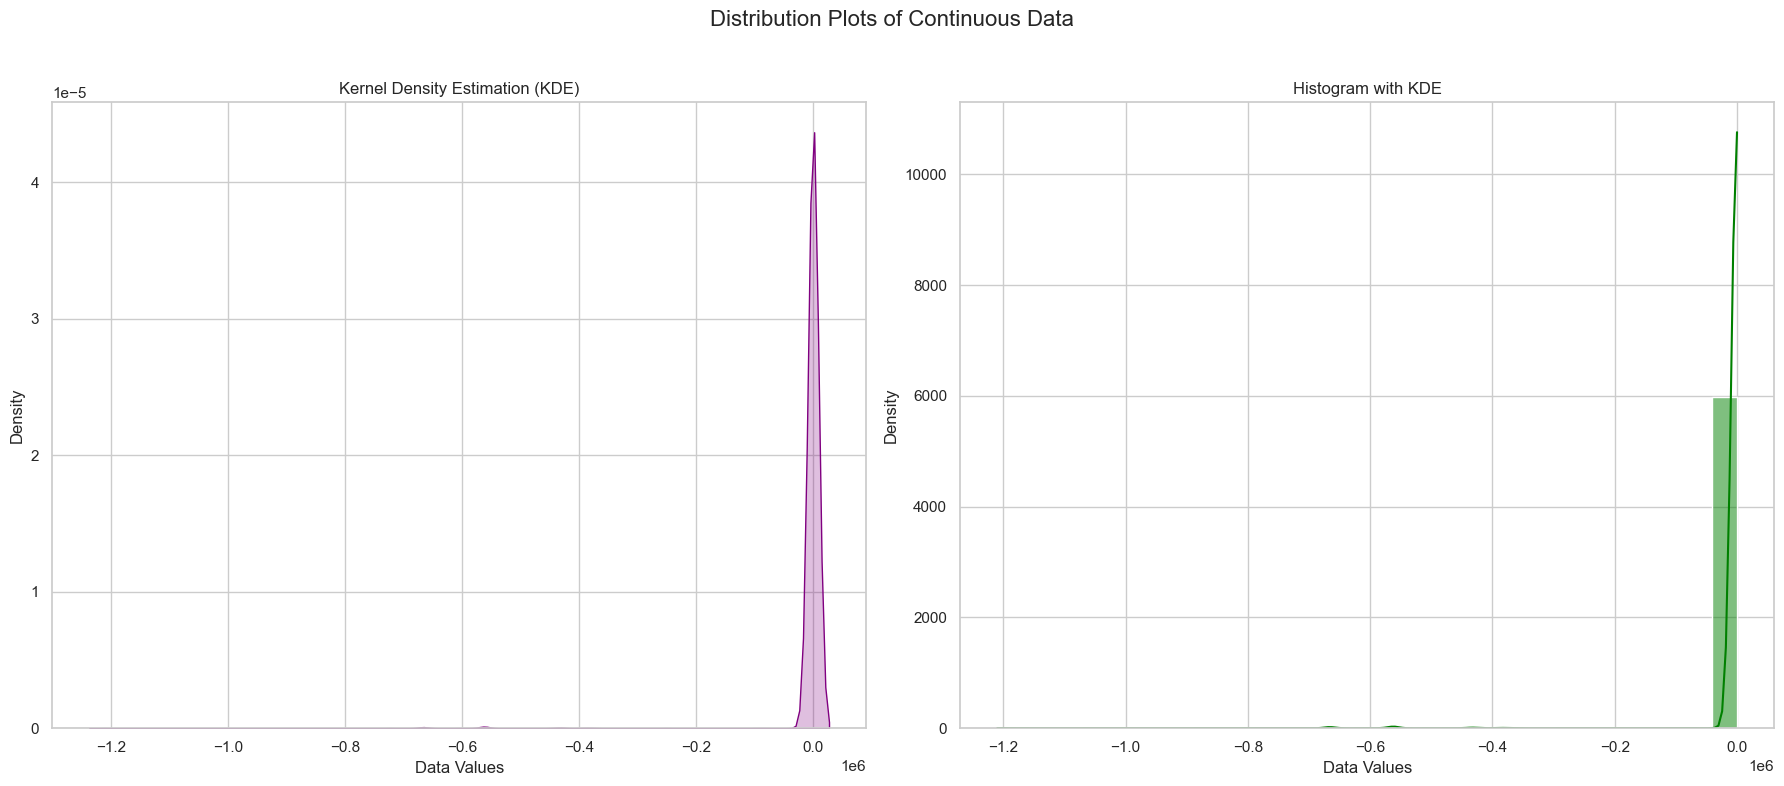

In [16]:
plot_distribution(n_g_score)

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_90264/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


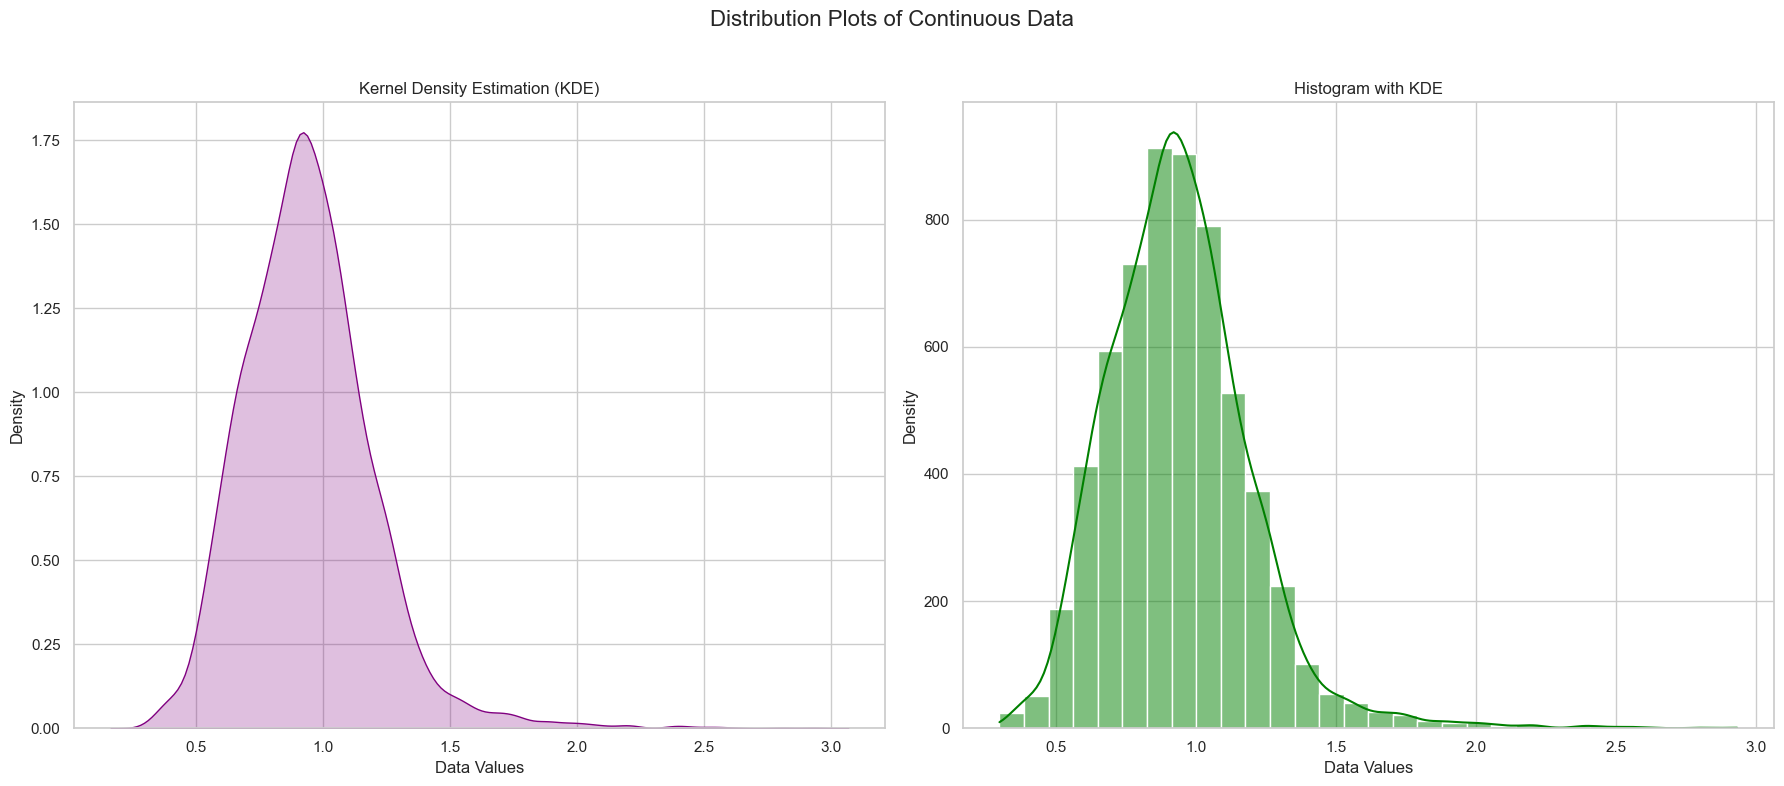

In [17]:
plot_distribution(harm_mean)